# 1.Business Problem

A certain university wants to understand the relationship between students’ SAT scores and their GPA. Build a Simple Linear Regression model with GPA as the target variable and record the RMSE and correlation coefficient values for different models.

# 1.1.Business Objective

A certain university wants to understand the relationship between students’ SAT scores and their GPA. Build a Simple Linear Regression model with GPA as the target variable and record the RMSE and correlation coefficient values for different models.

# 1.2.Constraints

A university wants to analyze the relationship between students’ SAT scores and their GPA to gain insights into how well SAT scores predict academic performance. By building a Simple Linear Regression model, the university aims to:

1)Understand the impact of SAT scores on students' GPA.

2)Predict a student’s GPA based on their SAT score.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score , mean_squared_error 

In [2]:
data = pd.read_csv("SAT_GPA.csv")
data

,SAT_Scores,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6
...,...,...
195,509,3.1
196,466,2.5
197,673,3.5
198,741,3.9


# 2.Work on each feature of the dataset to create a data dictionary as displayed in the image below:

In [3]:
data_dict = pd.DataFrame({
    'Feature': ['SAT_Scores', 'GPA'],
    'Data Type': [data['SAT_Scores'].dtype, data['GPA'].dtype],
    'Description': ['Time taken for delivery', 'Time taken for sorting items'],
    'Relevance': ['Relevant', 'Target Variable']
})
data_dict

,Feature,Data Type,Description,Relevance
0,SAT_Scores,int64,Time taken for delivery,Relevant
1,GPA,float64,Time taken for sorting items,Target Variable


# 3.Data Pre-processing

## 3.1 Data Cleaning, Feature Engineering, etc

In [4]:
#Check for missing values
data.isnull().sum()

SAT_Scores    0
GPA           0
dtype: int64

In [5]:
#Check for duplicate rows
data.duplicated().sum()

2

In [6]:
# Remove duplicates
data_cleaned = data.drop_duplicates()
data_cleaned

,SAT_Scores,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6
...,...,...
195,509,3.1
196,466,2.5
197,673,3.5
198,741,3.9


In [7]:
#check for invalid or zero values
(data == 0).sum()

SAT_Scores    0
GPA           0
dtype: int64

## 3.2 Outlier Treatment

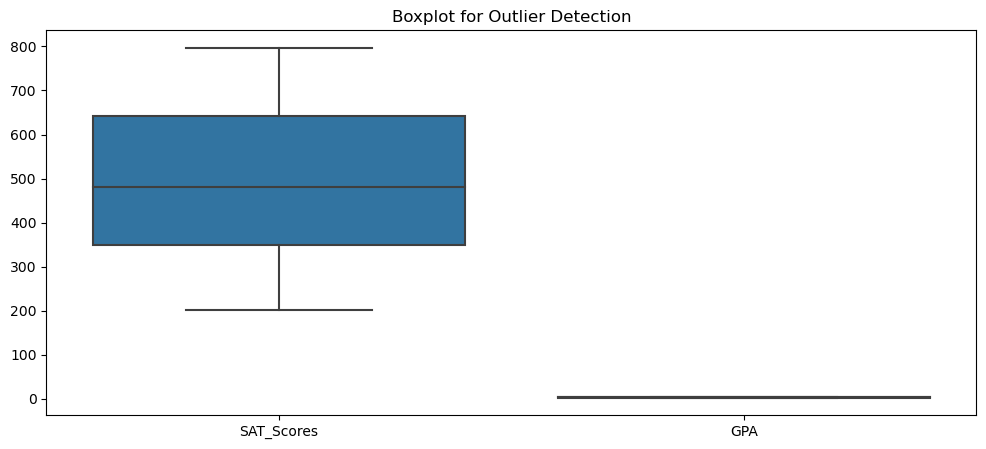

In [8]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 5))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [9]:
data.skew()

SAT_Scores    0.056610
GPA           0.311561
dtype: float64

In [10]:
data.kurtosis()

SAT_Scores   -1.224188
GPA          -1.040576
dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler ,FunctionTransformer
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
scaler =MinMaxScaler()

In [12]:
transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), ["SAT_Score"]),  # MinMax Scaling for feature
], remainder='passthrough')

# Create a pipeline with preprocessing and regression
pipeline = Pipeline([
    ("preprocessor", transformer),  # Apply column transformations
    ("log_transform", FunctionTransformer(np.log, validate=True)),  # Apply log transformation to target
])

# 4.Exploratory Data Analysis(EDA)

In [13]:
#Check the Data Structure 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT_Scores  200 non-null    int64  
 1   GPA         200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [14]:
data.describe()

,SAT_Scores,GPA
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


## 4.2 Univariate analysis

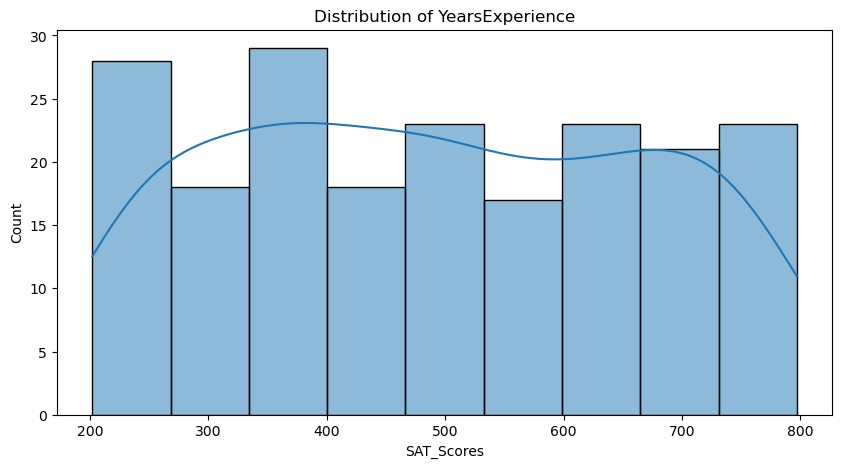

In [15]:
plt.figure(figsize =(10,5))
sns.histplot(data['SAT_Scores'], kde = True)
plt.title('Distribution of YearsExperience')
plt.show()

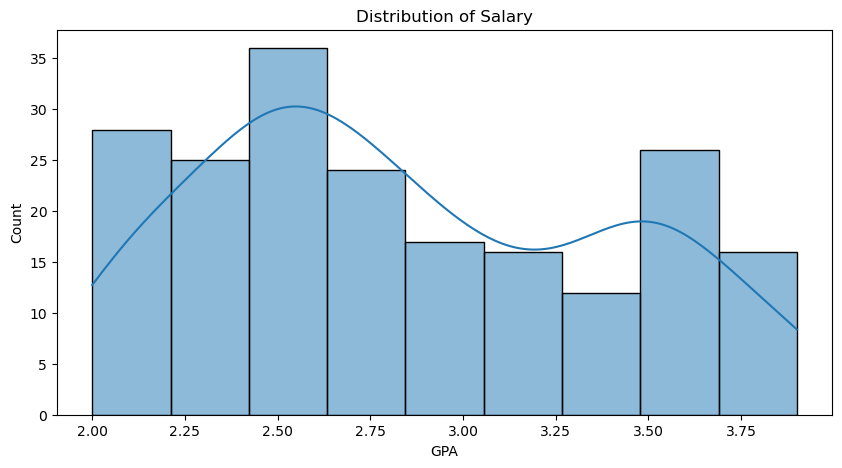

In [16]:
plt.figure(figsize =(10,5))
sns.histplot(data['GPA'], kde = True)
plt.title('Distribution of Salary')
plt.show()

In [17]:
#Set independent(x) and dependent(y) variable
X = data[['SAT_Scores']]
y = data['GPA']

## 4.3 Bivariate ananlysis

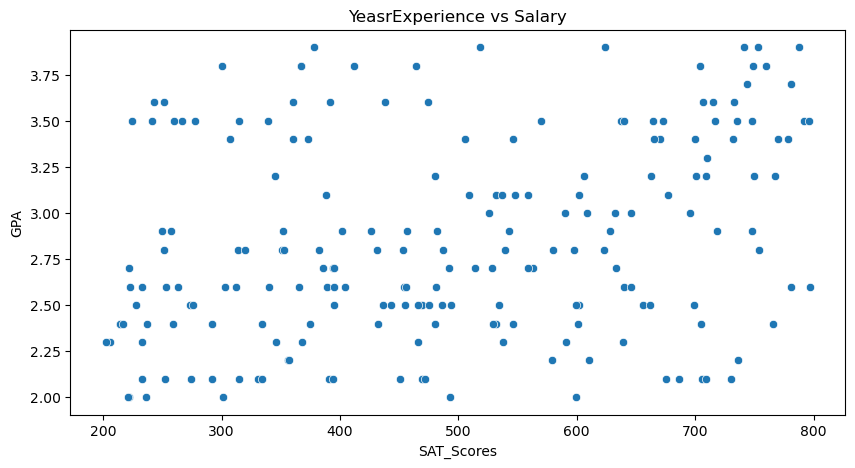

In [18]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'SAT_Scores', y ='GPA' ,data = data)
plt.title('YeasrExperience vs Salary')
plt.show()

In [19]:
#Splitting Data for Model Buliding
from sklearn.model_selection import train_test_split
X = data[['SAT_Scores']]
y = data['GPA']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# 5.1 Perform Simple Linear Regression

In [20]:
X = data[["SAT_Scores"]]  # Ensure it's a DataFrame
y = data["GPA"]  # Target variable


In [21]:
# Define column transformations (Scaling & Log Transform)
transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), ["SAT_Scores"])  # Scaling SAT scores
], remainder='passthrough')


In [22]:
from sklearn.model_selection import train_test_split 
# 🔹 Create a pipeline with transformations and regression model
pipeline = Pipeline([
    ("preprocessor", transformer),  # Preprocessing
    ("regressor", LinearRegression())  # Linear Regression Model
])

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.2, random_state=42)


In [23]:
pipeline = Pipeline([
    ("preprocessor", transformer),  # Preprocessing
    ("regressor", LinearRegression())  # Linear Regression Model
])

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.2, random_state=42)

# 🔹 Fit the pipeline
pipeline.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['SAT_Scores'])])),
                ('regressor', LinearRegression())])

In [24]:
# Make predictions
y_pred_log = pipeline.predict(X_test)  
y_pred = np.exp(y_pred_log)  # Convert back from log-scale

# Model Evaluation
rmse = np.sqrt(mean_squared_error(np.exp(y_test), y_pred))
r2 = r2_score(np.exp(y_test), y_pred)

print(f" RMSE: {rmse:.4f}")
print(f" R 2Score: {r2:.4f}")

 RMSE: 0.5409
 R 2Score: 0.0294


<Axes: xlabel='SAT_Scores', ylabel='GPA'>

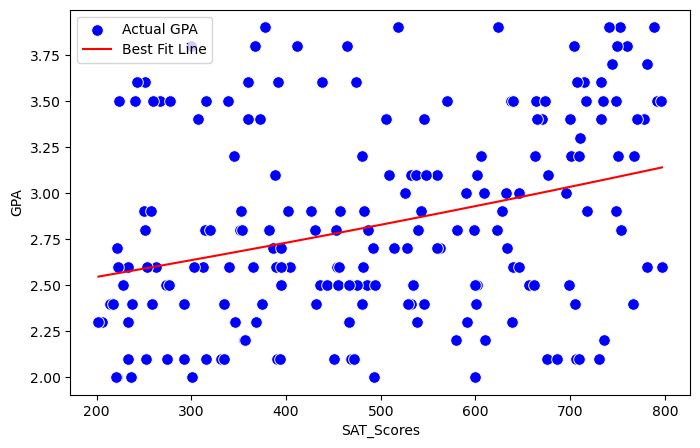

In [25]:
data["GPA_Predicted_Log"] = pipeline.predict(data[["SAT_Scores"]])
data["GPA_Predicted"] = np.exp(data["GPA_Predicted_Log"]) 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["SAT_Scores"], y=data["GPA"], label="Actual GPA", color="blue", s=70)
sns.lineplot(x=data["SAT_Scores"], y=data["GPA_Predicted"], label="Best Fit Line", color="red")


In [27]:
# Apply transformations using pipeline
data["GPA_Predicted_Log"] = pipeline.predict(data[["SAT_Scores"]])  # Use pipeline for predictions
data["GPA_Predicted"] = np.exp(data["GPA_Predicted_Log"])  # Convert back

In [29]:
import statsmodels.formula.api as smf
model=smf.ols('y~X',data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.67
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.46e-05
Time:                        10:36:48   Log-Likelihood:                -151.44
No. Observations:                 200   AIC:                             306.9
Df Residuals:                     198   BIC:                             313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4029      0.110     21.908      0.0

In [36]:
y_pred1 = model.predict(data[['SAT_Scores']])

In [37]:
y_pred1 = model.predict(X)

In [38]:
r2 = r2_score(data['GPA'], y_pred1)
r2

0.08616471916950963

In [42]:
mean_squared_error(data.GPA,y_pred1)

0.2661999888471016

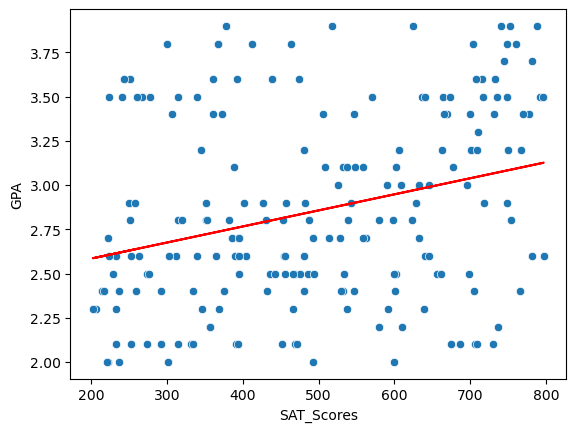

In [46]:
sns.scatterplot(data,x='SAT_Scores',y='GPA')
plt.plot(data.SAT_Scores,y_pred1,color='red')

# 6.The benefits/impact of the solution

After building the Simple Linear Regression model to predict salary hikes based on years of experience, we analyzed different variations and transformations to optimize model performance. Here are the key takeaways:

Final Business Insights
No model can make for this type of data